In [1]:
# Import dependency
import pandas as pd
import numpy as np

In [2]:
data_file = "../Data/ex2data1.txt"
# data = pd.read_csv(data_file, header=None)
data = np.loadtxt(data_file, delimiter = ',')

In [23]:
#funtion to draw the scatter
import matplotlib.pyplot as plt
%matplotlib inline
def render_exams(data, admitted, rejected):
    plt.figure(figsize=(6, 6))

    plt.scatter(data[admitted, 0],
                data[admitted, 1],
                c='b', marker='+', label='admitted')
    plt.scatter(data[rejected, 0],
                data[rejected, 1],
                c='r', marker='o', label='rejected')
    plt.xlabel('Exam 1 score');
    plt.ylabel('Exam 2 score');
    plt.axes().set_aspect('equal', 'datalim')
    plt.legend();


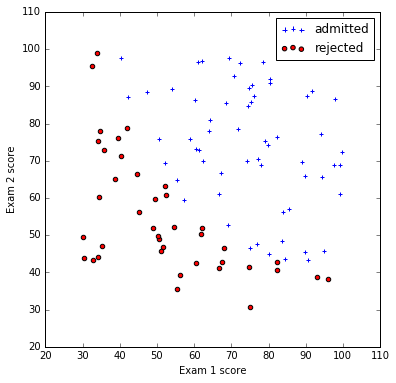

In [4]:
train_data = data[:, :-1]
labels = data[:, 2]

admitted = [ idx for idx, x in enumerate(labels) if x == 1]
rejected = [ idx for idx, x in enumerate(labels) if x == 0]

render_exams(data, admitted, rejected)

In [28]:
from sklearn import tree

# Train
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(train_data, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [29]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data, feature_names=["math","english"], class_names=["rejected", "admitted"]) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("exam_score.pdf") 

True

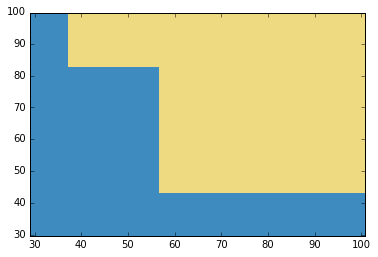

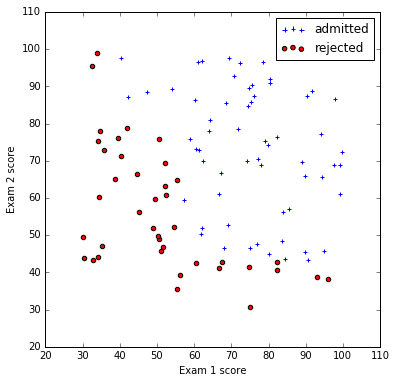

In [30]:
predict_lables = clf.predict(train_data)

predict_rejected = [idx for idx, x in enumerate(predict_lables) if x == 0]
predict_admitted = [idx for idx, x in enumerate(predict_lables) if x == 1]


def draw_decision_boundary(X, plot_step = 0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
draw_decision_boundary(train_data)
render_exams(data , admitted=predict_admitted, rejected= predict_rejected)

In [31]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(predict_lables, labels)
print(acc_score)

0.94
